# Explore Personalization Using Multi-Dataset

#### In this notebook, we explore the impact of using three datasets (M2sleep, HeartS, BiheartS) in model personlization. The three datasets are collected in the wild, through different longitudinal data collection campaigns.

#### - The three datasets use Empatica E4 wristband device, to collect several physiological signals (BVP, EDA, TEMP)

#### - In this notebook, we are going to explore the impact of dataset bias on the personlization sleep quality recognition task 

#### - To this goal, we are going to compare three machine learning model (population model, one-user-only model, and personalized model) using 

##### ***1. single dataset***

##### ***2. Mutiple datasets***

##### ***2. Mixed datasets***

#### In this notebook, we implemt the ***multiple datasets*** scenario


## 1. Load packages

In [1]:
from sys import path 
path.append("../")
from source.models.prequential_online_learning import PrequentialOnlineLearning as PrequentialOnlineLearning
from source.utils.helper_functions import visualize_models_results
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

# Generate a list of 50 unique integers to use as seeds
seed_list = np.arange(50)  # Create an array with integers from 0 to 49
# Convert to list
seed_list = seed_list.tolist()

## 2. Define helper function

In [2]:
def recognize_sleep_quality(datasets:PrequentialOnlineLearning, seed_list:list, featurs_list:list, training_set , dataset_name:str, mode:str, modalitiy:str, model:str , testing_set=None):
    preqacc_personalized_model_results, acc_population_model, acc_baseline_model_results, acc_biased_baseline_model_results, acc_personalized_biased_baseline_model_results , keys = datasets.recognize_sleep_quality(training_set, 
                                                                                                                                                                       seed_list,
                                                                                                                                                                       mode=mode, 
                                                                                                                                                                       modality=modalitiy,
                                                                                                                                                                       model = model,
                                                                                                                                                                       featurs_list= featurs_list ,
                                                                                                                                                                       testing_dataset = testing_set)
    plt = visualize_models_results(f"Models performance using features from {modalitiy} modality using {model} with \n multiple dataset scenario (test on {dataset_name})", 
                            preqacc_personalized_model_results, 
                            acc_population_model, 
                            acc_baseline_model_results,
                            acc_biased_baseline_model_results,
                            acc_personalized_biased_baseline_model_results)

    plt.savefig(f"../visualizations/models_performance/multiple_dataset_{dataset_name}_{modalitiy}_features_{model}_model.pdf", bbox_inches="tight")
    plt.show()
    return  preqacc_personalized_model_results, acc_population_model, acc_baseline_model_results, acc_biased_baseline_model_results, acc_personalized_biased_baseline_model_results, keys

## 3. Prequential evaluation method

## 3.1. Load the two datasets

In [3]:
contextual_features_list  = ["awakening", "sleep_duration_hrs", "slept_before_midnight", "wake_up_before_midday"]
hr_features_list = ["hr_mean","hr_standard_deviation", "hr_standard_error", "hr_maximum", "hr_minimum", "hr_median", "hr_variance", "hr_quantile","hr_dc_component", "hr_sum_spectral_coeffs", "hr_entropy", "hr_energy",]
temp_features_list = ["TEMP_mean", "TEMP_standard_deviation", "TEMP_standard_error",  "TEMP_maximum", "TEMP_minimum", "TEMP_median", "TEMP_variance", "TEMP_quantile", "TEMP_dc_component", "TEMP_sum_spectral_coeffs", "TEMP_entropy", "TEMP_energy"]
acc_features_list = ["ACC_mean", "ACC_standard_deviation", "ACC_standard_error", "ACC_maximum", "ACC_minimum", "ACC_median", "ACC_variance", "ACC_quantile", "ACC_dc_component",  "ACC_sum_spectral_coeffs", "ACC_entropy", "ACC_energy",]
hrv_features_list = ["Mean_NNI",  "SDNN", "SDSD", "NN50", "pNN50", "NN20", "pNN20", "RMSSD", "Median_NN", "Range_NN", "CVSD", "CV_NNI", "LF", "HF", "VLF", "LH_HF_ratio", "LFnu", "HFnu", "Total_Power"]
labels_list = ["sleep_quality", "sleep_quality_binary"]


datasets = PrequentialOnlineLearning(contextual_features_list = contextual_features_list,
                    hr_features_list = hr_features_list,
                    temp_features_list = temp_features_list,
                    acc_features_list = acc_features_list,
                    hrv_features_list = hrv_features_list, 
                    labels_list = labels_list,
                    BiheartS_dataset_path = "../Data2/extracted_features_BiheartS.csv",
                    M2sleep_dataset_path= "../Data2/extracted_features_M2sleep.csv",
                    datasets_names = ["BiheartS", "M2sleep"])

modality_feature_list_dict = {
    "HR": hr_features_list,
    "HRV": hrv_features_list,
    "Contextual": contextual_features_list,
    "ACC": acc_features_list,
    "ST": temp_features_list,
    "All sensors": hr_features_list + hrv_features_list + acc_features_list + temp_features_list,
    "All": contextual_features_list +  hr_features_list + hrv_features_list + acc_features_list + temp_features_list
}

test_dataset_name_test_dataset_feature_vectors_dict = {
    "M2sleep": datasets.M2sleep_dataset,
      "BiheartS": datasets.Bihearts_dataset,
}

test_dataset_name_train_dataset_feature_vectors_dict = {
    "M2sleep": datasets.Bihearts_dataset,
      "BiheartS": datasets.M2sleep_dataset,
}



## 3.2. Compare ML models

processing M2sleep and HR modality 


Processing Items: 100%|██████████| 50/50 [00:57<00:00,  1.14s/it]


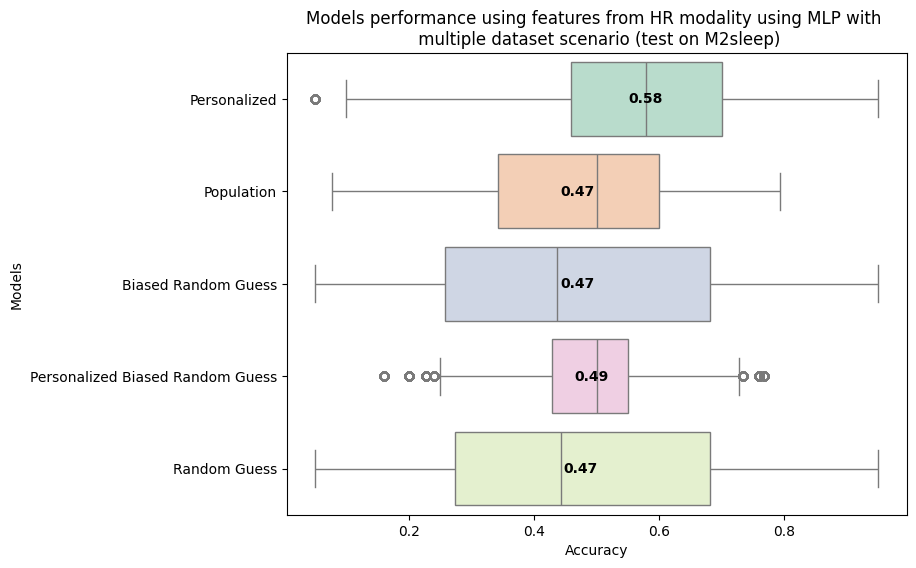

processing M2sleep and HRV modality 


Processing Items: 100%|██████████| 50/50 [00:59<00:00,  1.19s/it]


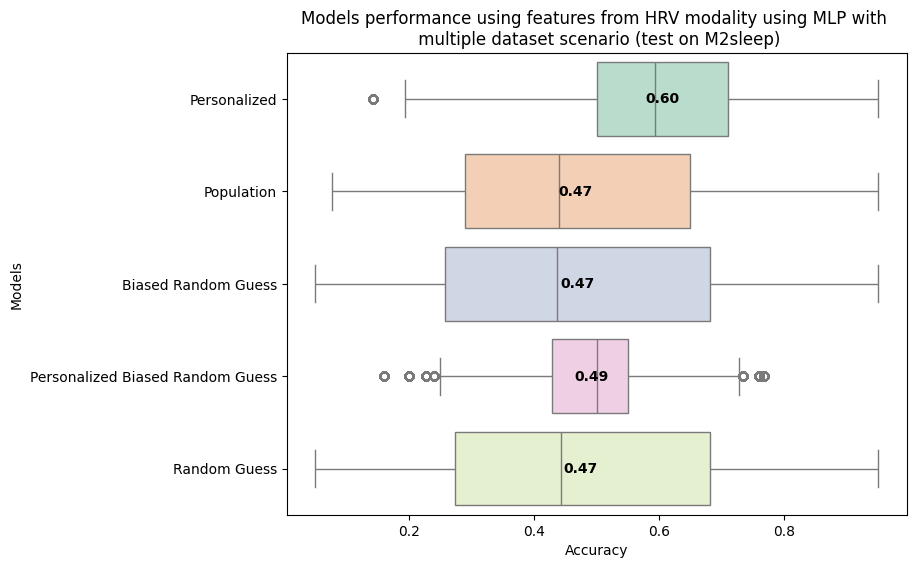

processing M2sleep and Contextual modality 


Processing Items: 100%|██████████| 50/50 [00:55<00:00,  1.11s/it]


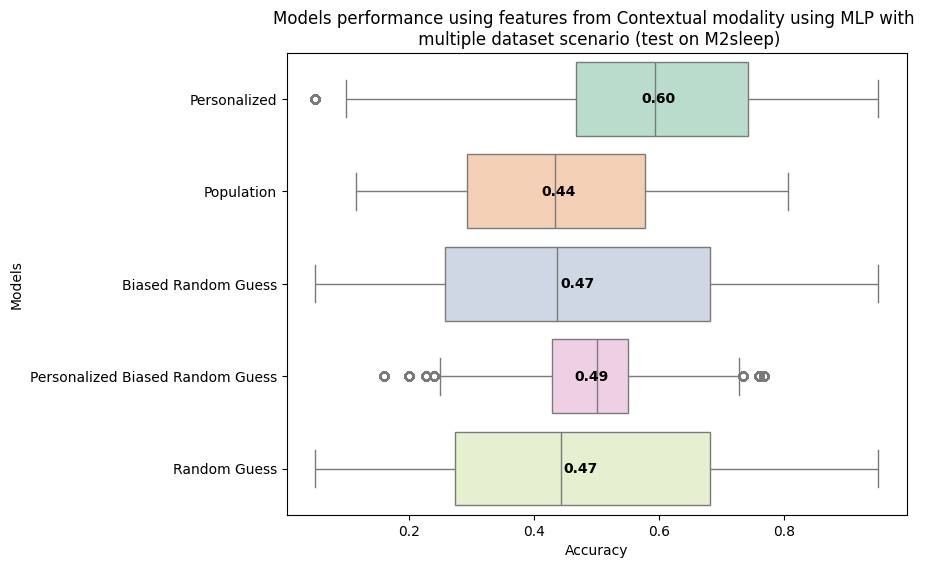

processing M2sleep and ACC modality 


Processing Items: 100%|██████████| 50/50 [00:58<00:00,  1.16s/it]


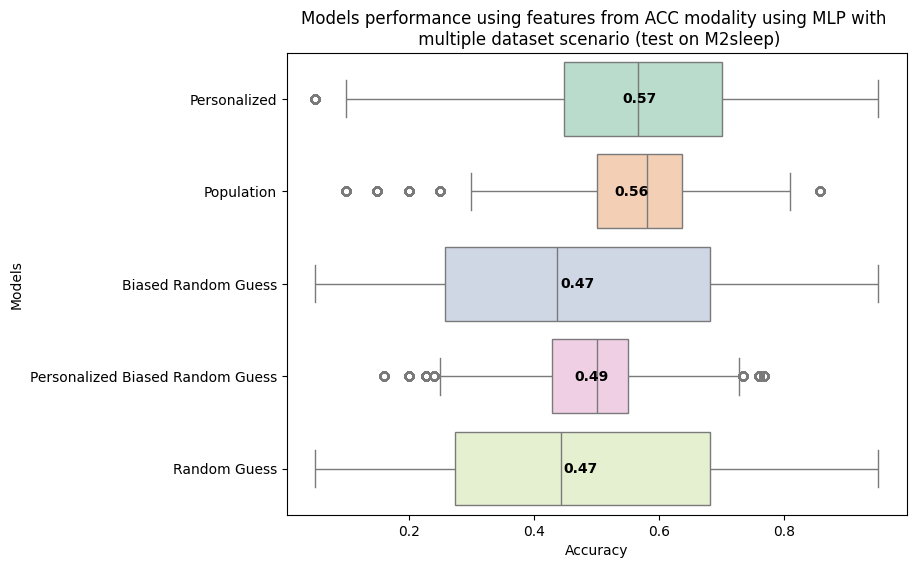

processing M2sleep and ST modality 


Processing Items: 100%|██████████| 50/50 [00:59<00:00,  1.18s/it]


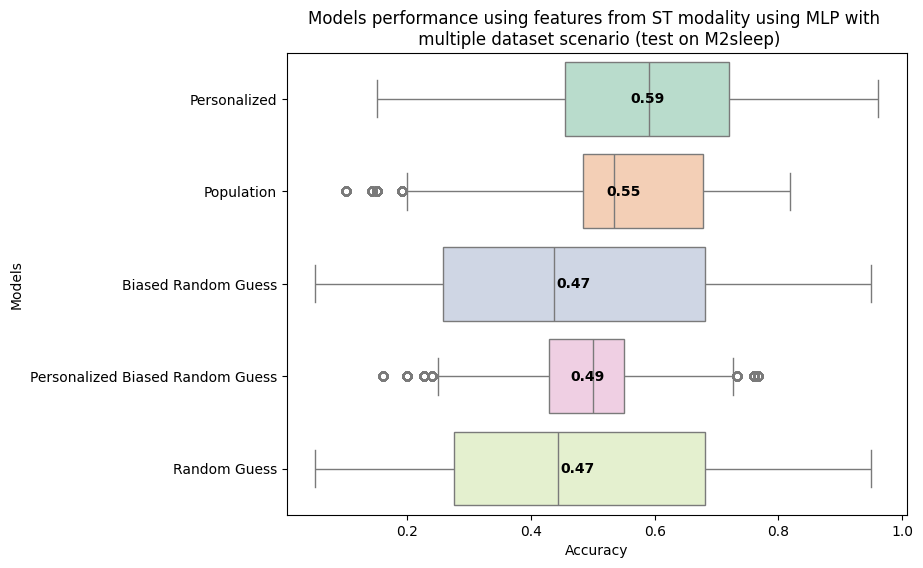

processing M2sleep and All sensors modality 


Processing Items: 100%|██████████| 50/50 [01:05<00:00,  1.32s/it]


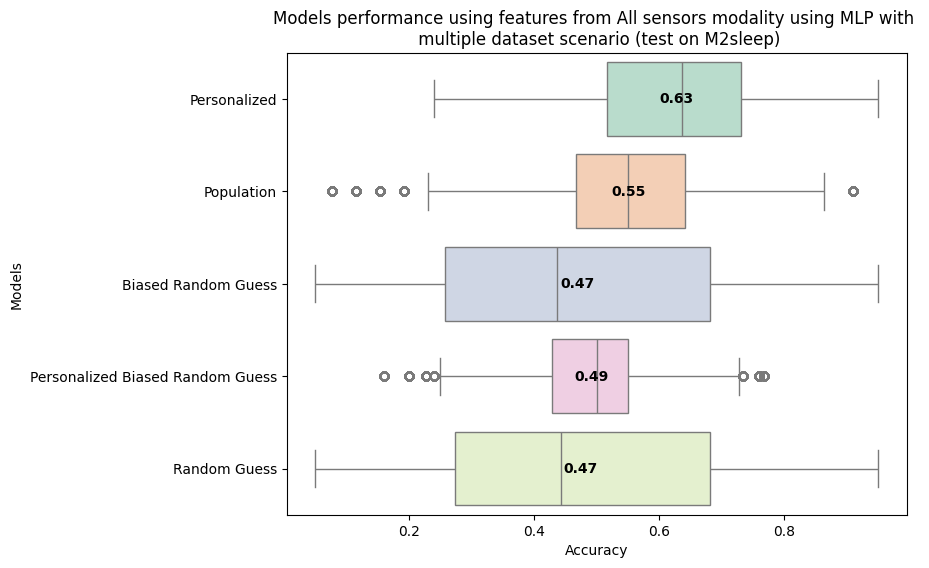

processing M2sleep and All modality 


Processing Items: 100%|██████████| 50/50 [01:09<00:00,  1.39s/it]


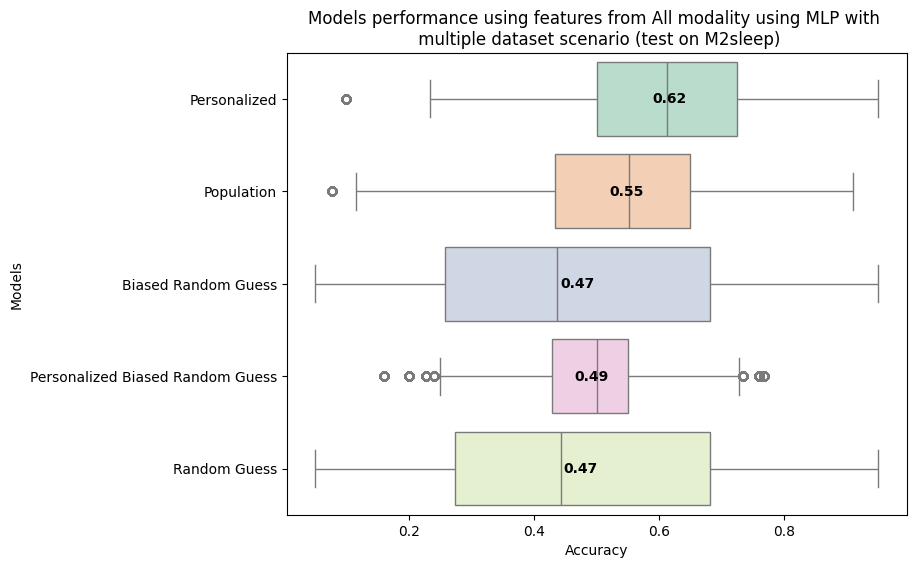

processing BiheartS and HR modality 


Processing Items: 100%|██████████| 50/50 [00:58<00:00,  1.18s/it]


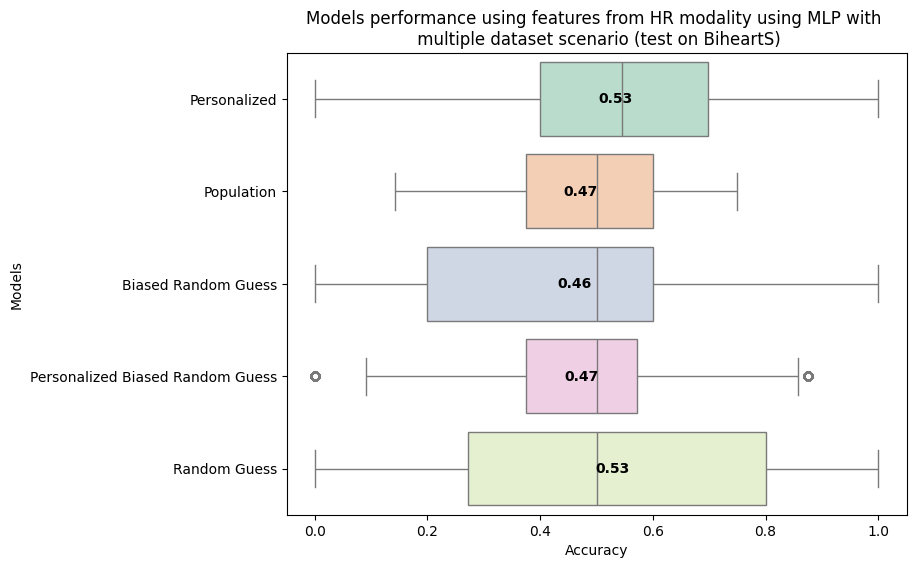

processing BiheartS and HRV modality 


Processing Items: 100%|██████████| 50/50 [01:00<00:00,  1.22s/it]


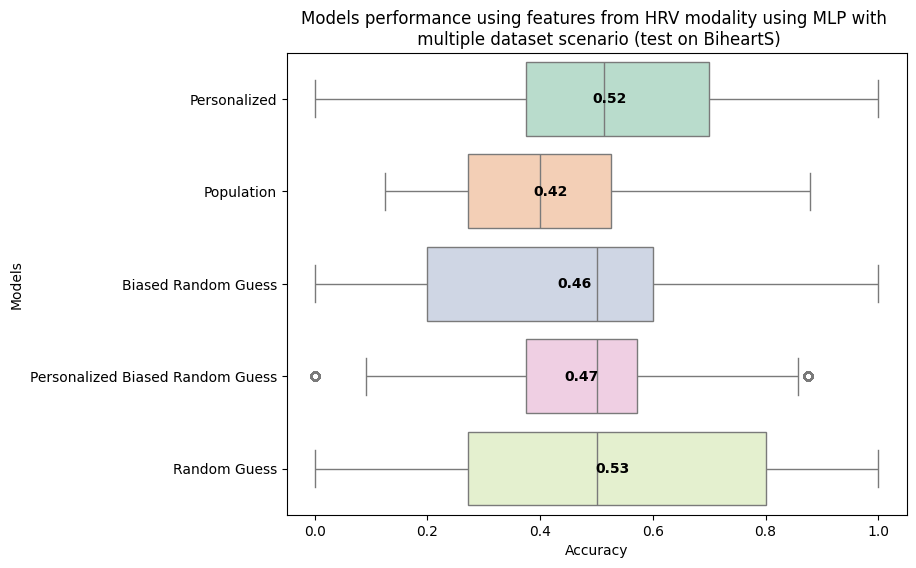

processing BiheartS and Contextual modality 


Processing Items: 100%|██████████| 50/50 [00:37<00:00,  1.35it/s]


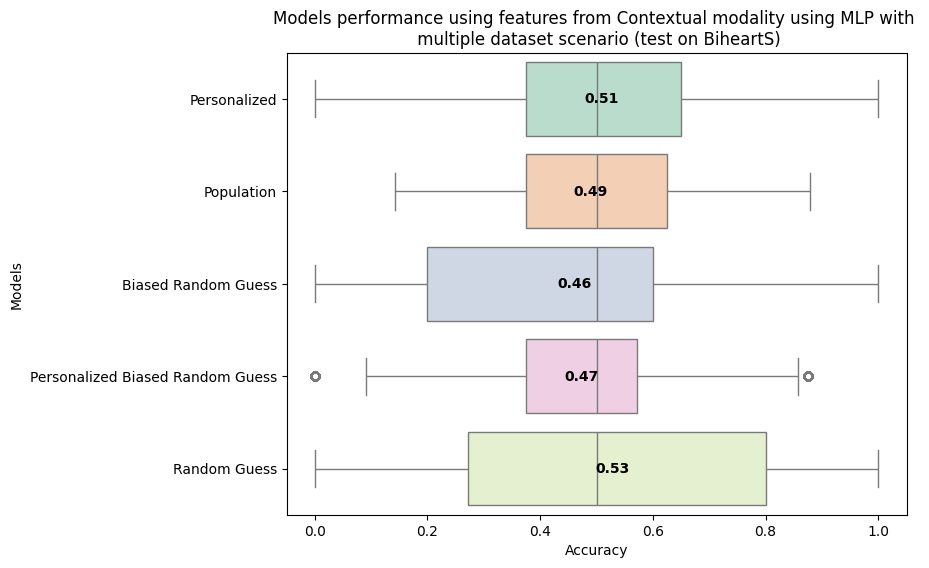

processing BiheartS and ACC modality 


Processing Items: 100%|██████████| 50/50 [00:59<00:00,  1.19s/it]


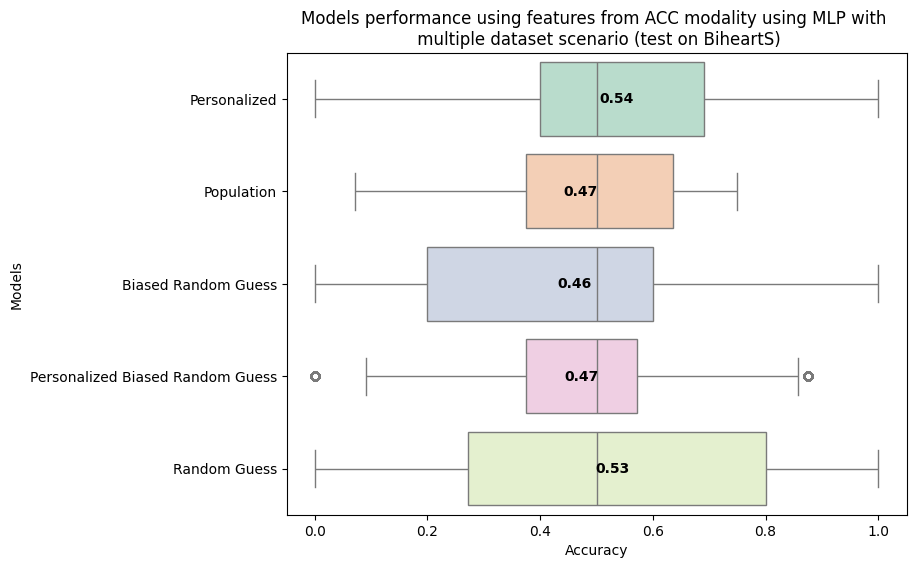

processing BiheartS and ST modality 


Processing Items: 100%|██████████| 50/50 [00:59<00:00,  1.20s/it]


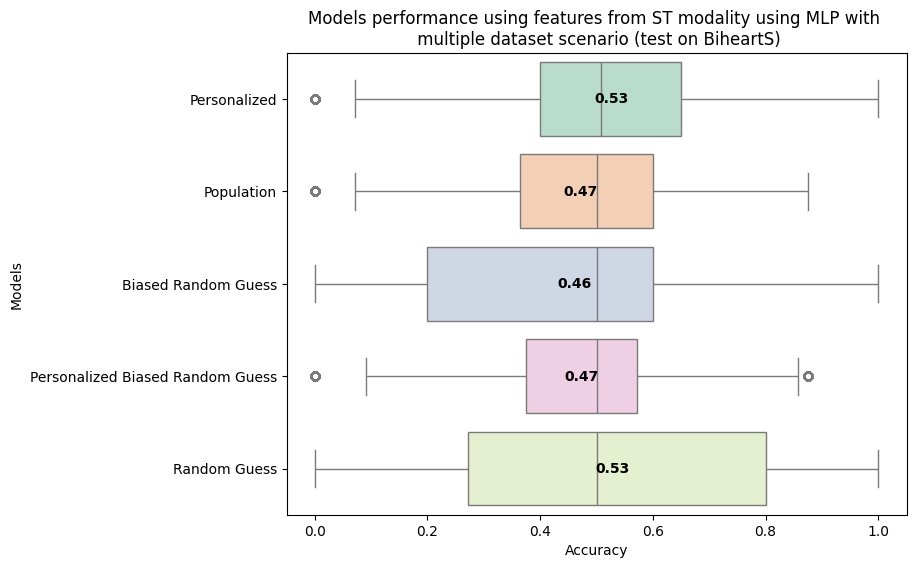

processing BiheartS and All sensors modality 


Processing Items: 100%|██████████| 50/50 [01:13<00:00,  1.46s/it]


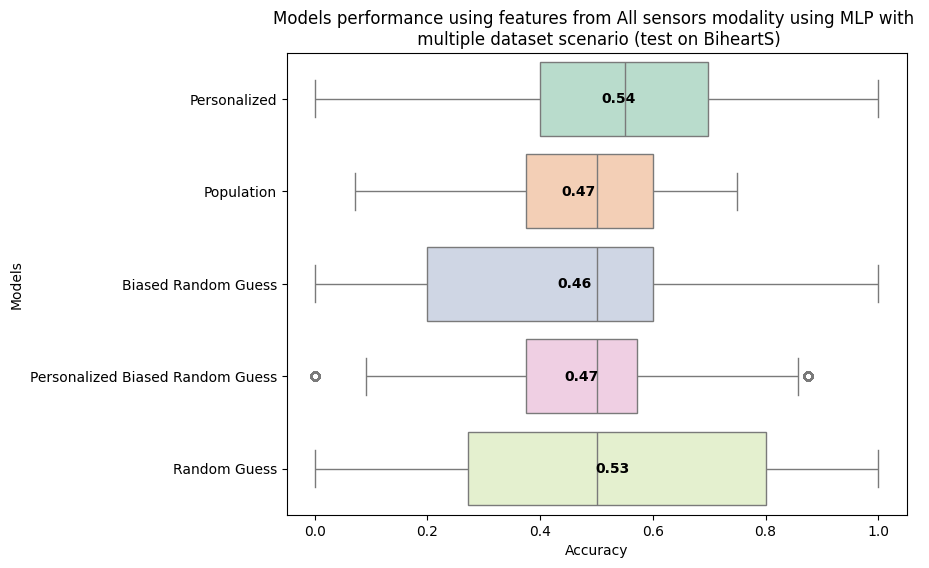

processing BiheartS and All modality 


Processing Items: 100%|██████████| 50/50 [01:10<00:00,  1.42s/it]


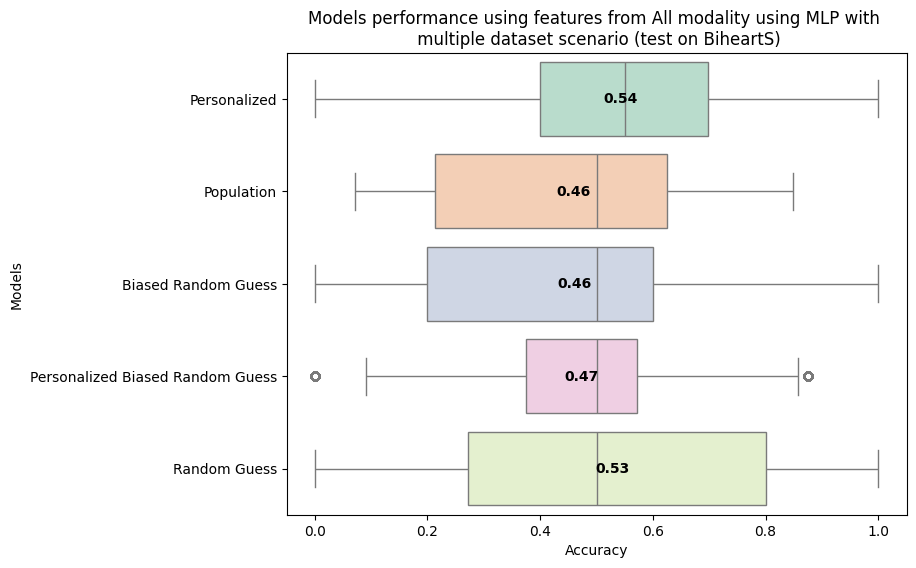

In [4]:
participant_modality_models_performance_mutiple_dataset = pd.DataFrame(columns=["participant_id",
                                                                                "modality",
                                                                                "dataset_name",
                                                                                "personalized_model",
                                                                                "population_model",
                                                                                "personalized_biased_radom_guess",
                                                                                "biased_random_guess",
                                                                                "random_guess"])
model_name = "MLP"
for test_dataset in test_dataset_name_test_dataset_feature_vectors_dict:
    for modality in modality_feature_list_dict:
        print(f"processing {test_dataset} and {modality} modality ")
        personalized_model, population_model, random_guess, biased_random_guess, personalized_biased_radom_guess, participant_keys  = recognize_sleep_quality (datasets=datasets, 
                                                                                                                                                                    seed_list= seed_list,
                                                                                                                                                                    mode="multiple", 
                                                                                                                                                                    dataset_name = test_dataset, 
                                                                                                                                                                    modalitiy=modality,
                                                                                                                                                                    model = model_name, 
                                                                                                                                                                    featurs_list = modality_feature_list_dict[modality], 
                                                                                                                                                                    training_set= test_dataset_name_train_dataset_feature_vectors_dict [test_dataset], 
                                                                                                                                                                    testing_set= test_dataset_name_test_dataset_feature_vectors_dict[test_dataset])
        # Create a DataFrame from the lists
        final_df = pd.DataFrame({
                            "participant_id": participant_keys,
                            "personalized_model": personalized_model ,
                            "population_model": population_model,
                            "personalized_biased_radom_guess": personalized_biased_radom_guess,
                            "biased_random_guess": biased_random_guess,
                            "random_guess": random_guess,
                        })

        # Group by participant_id and calculate the mean for each participant, separately for each score column
        #mean_scores = df.groupby('participant_id').mean().reset_index()

        # Output the result as a new DataFrame
        #final_df = pd.DataFrame(mean_scores)
        final_df["modality"] =  [modality] * len(final_df)
        final_df["dataset_name"] =  [test_dataset] * len(final_df)

        participant_modality_models_performance_mutiple_dataset = pd.concat([participant_modality_models_performance_mutiple_dataset, final_df])

participant_modality_models_performance_mutiple_dataset.to_csv(f"../output_files/participant_modality_models_performance_multiple_dataset_{model_name}_with_training_data_shuffling.csv")
      